> ## Essential Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [3]:
#resd csv file
df = pd.read_csv("..\data\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#check null values in Dataset
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

> ## Features Encoding using One Hot Encoding Technique

In [6]:
dummies = pd.get_dummies(df, drop_first=True)
dummies.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
# Split data features into dependent and independent
# X is Independent variables
# y is dependent variables
X = dummies.iloc[:,1:]
y = dummies.iloc[:,0]

> ## Feature Selection

In [8]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

### feature Score

In [9]:
model.feature_importances_

array([1.29977626e-04, 1.09371327e-03, 3.32919510e-04, 5.84866509e-04,
       8.01746478e-04, 1.93114778e-04, 4.28966924e-03, 4.93238156e-03,
       8.19649672e-04, 1.36924861e-03, 1.25471612e-03, 5.06054513e-04,
       2.29086289e-03, 4.09928136e-04, 3.38949217e-04, 3.05205329e-03,
       4.43443833e-03, 4.50613293e-02, 1.24656506e-02, 8.28846935e-02,
       6.30983406e-03, 9.31983423e-04, 1.45991360e-01, 2.39423729e-02,
       8.88599472e-03, 1.09983602e-02, 1.31986914e-04, 2.48146776e-02,
       8.57265017e-02, 1.47901560e-06, 1.54696259e-03, 2.26543453e-03,
       1.01417364e-04, 2.31255291e-03, 1.41975665e-04, 5.06552129e-04,
       8.11300827e-04, 7.80098857e-04, 3.80311335e-03, 2.25611758e-04,
       1.60344387e-02, 1.36938005e-02, 1.27695509e-02, 1.95453686e-02,
       1.93406187e-03, 4.62463592e-02, 3.41504485e-02, 2.56369498e-04,
       3.07341538e-02, 1.49716080e-02, 5.90216721e-03, 7.67526804e-04,
       3.34896467e-04, 2.82406685e-03, 6.81234957e-04, 9.75314355e-04,
      

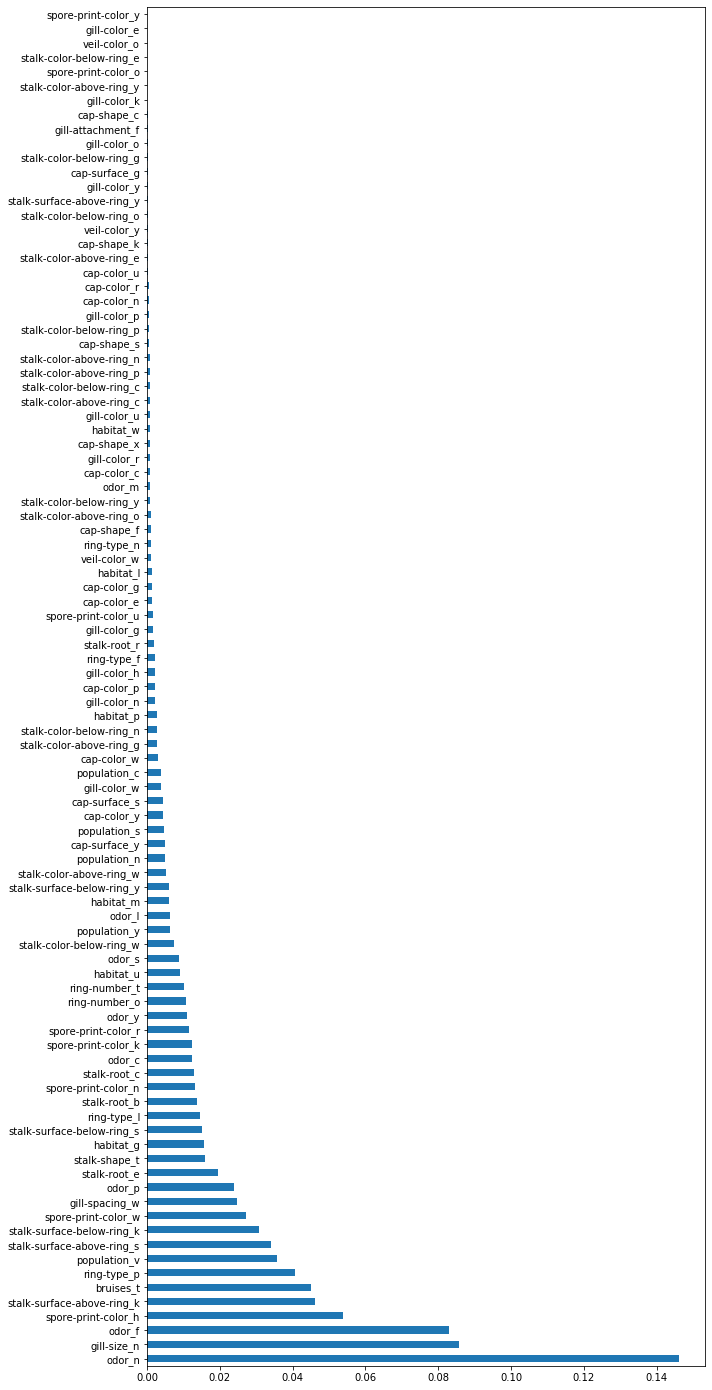

In [10]:
plt.figure(figsize=(10, 25))
feature_rank = pd.Series(model.feature_importances_, index = X.columns)
feature_rank.nlargest(95).plot(kind = "barh")

### In above Grraph We include, First 17 Columns have less importance so Drop this columns

In [11]:
drop_column = feature_rank.nsmallest(17).index
X.drop(drop_column, axis = 1, inplace=True )

> ## Model Building

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

> ## Check Accurracy of Model

In [13]:
y_predict = rf_model.predict(X_test)
print("Score : {}".format(rf_model.score(X_test, y_test)))
print("Mean absolute error : {}".format(metrics.mean_absolute_error(y_test, y_predict)))
print("R-square Value : {}".format(metrics.r2_score(y_test, y_predict)))

Score : 1.0
Mean absolute error : 0.0
R-square Value : 1.0


Text(69.0, 0.5, 'Truth')

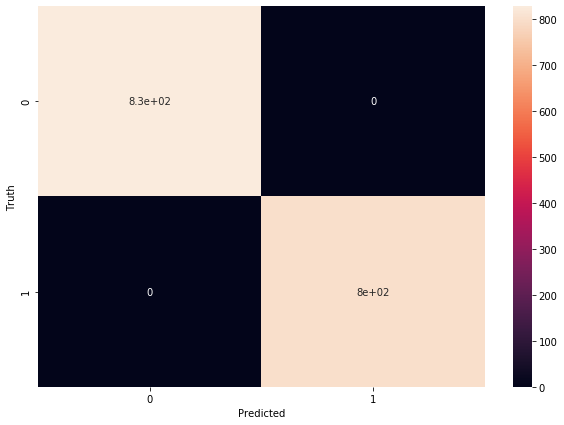

In [17]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')